Tableau dashboard link: https://public.tableau.com/views/Maxtest/MarketingAnalytics?:language=en-US&:display_count=n&:origin=viz_share_link

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
marketing_data = pd.read_csv('https://drive.google.com/u/0/uc?id=1mA3iLoF-8C8BtDmt4RRgNXH9s6M7I14r&export=download')
data = marketing_data.copy()

Getting to know our data:

In [3]:
display(data.head(3))
data.info()
print(data.columns)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

From the output we can see that the table contain 2240 rows and 20 columns, 23 int and 5 object data types.
We can see that column *" Income "* has issues with spaces in its name and it has ofject type instead of numeric one and **it has missing values**. "Dt Customer" is object instead of Date type. 

We can fix the "Income' columns name, change its type, replace unnecessary symbols in the values. Also we can change Dt customer type to Date. And, add another colmn "Age" from the customer's year of birth:




In [4]:
data.columns = data.columns.str.replace(' Income ', 'Income')
data['Income'] = data['Income'].apply(lambda x: str(x).replace('$', ''))
data['Income'] = data['Income'].apply(lambda x: str(x).replace(',', ''))
data['Income'] = data['Income'].astype('float64')
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Age'] = 2022 - data['Year_Birth']

In [5]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

We found abnormal value in the Income column - 666666. Lets check it on the charts below:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

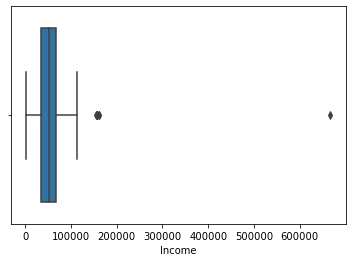

In [6]:
sns.boxplot(data['Income'])

Lets remove abnormal values over 200000 in Income column:

In [7]:
outliers = data[data['Income'] > 200000]
data = data.drop(outliers.index, axis=0)


Defining the percent of missing values in Income column and fill the mean Income column value

In [8]:
print((data['Income'].isna().mean()*100).round(2))
data['Income'] = data['Income'].fillna(data['Income'].mean())

1.07


Lets check if there are any missing values left in our data set:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int64         
 2   Education            2239 non-null   object        
 3   Marital_Status       2239 non-null   object        
 4   Income               2239 non-null   float64       
 5   Kidhome              2239 non-null   int64         
 6   Teenhome             2239 non-null   int64         
 7   Dt_Customer          2239 non-null   datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   int64         
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   int64         
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239 non-nul

Lets check if there are any duplicates in our data set:

In [10]:
mask = data.duplicated(subset=data.columns)
data_duplicates = data[mask]
print(f'Number of found duplicates: {data_duplicates.shape[0]}')


Number of found duplicates: 0


In [11]:
(data['Marital_Status'].value_counts(normalize=True)*100).round(2)

Married     38.59
Together    25.86
Single      21.44
Divorced    10.36
Widow        3.44
Alone        0.13
Absurd       0.09
YOLO         0.09
Name: Marital_Status, dtype: float64

Lets make some manipulations with the data set columns: 
 1. We create a *Total purchases* column to see total purchases from all channels. 
 2. We create an Age classification column where we will make some small age groups: 
    - young (< 25)
    - young adult (25 <= and < 45)
    - middle age (45 <= and < 60)
    - elderly age (60 <= and < 75)
    - senile age (> 75)
 3. We add column with month of customer's enrollment with the company
 4. We edit column Marital_Status by grouping small % statuses to 'Other'

In [12]:
data['TotalNumPurchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data['TotalMntSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

def age_classification(row):
    if row < 25:
        return 'young (< 25)'
    if 25 <= row < 45:
        return '25 <= young adult < 45'
    if 45 <= row < 60: 
        return '45 <= middle age < 60'
    if 60 <= row < 75: 
        return '60 <= elderly age < 75'
    if 75 <= row: 
        return 'senile age > 75'

data['AgeClassification'] = data['Age'].apply(age_classification)

data['Customer_month'] = data['Dt_Customer'].dt.strftime('%Y-%m')

marital_status_list = ['Married', 'Together', 'Single']
data['Marital_Status'] = data['Marital_Status'].apply(lambda x: x if x in marital_status_list else 'Other')
(data['Marital_Status'].value_counts(normalize=True)*100).round(2)

Married     38.59
Together    25.86
Single      21.44
Other       14.11
Name: Marital_Status, dtype: float64

In [13]:
line_data = data.groupby('Customer_month', as_index=False).sum()
fig = px.line(
    data_frame=line_data, 
    x='Customer_month', 
    y=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], 
    height=500, 
    width=1000, 
    title='Dynamics of amount spent on products in the last 2 years'
)
fig.show()

- From our graph, we see that wine and fruit were sold the best.
- The rest of the product categories were at about the same low level. 
- Also, we can see that since October 2013 there has been a steady decline in sales in all categories of goods.

In [14]:
response_data = data.groupby(['Marital_Status', 'AgeClassification'], as_index=False)['Response'].sum()
fig = px.bar(
   response_data,
   x = 'AgeClassification',
   y = 'Response',
   color = 'Marital_Status', 
   barmode = 'group',
   text_auto=True
   
   
)
fig.update_layout(title="Distribution of customer response on the last campaign by Marital Status and Age Classification")
fig


From this chart we can see that the most customers accepted the offer in the last campaign in a Single group (in total). 
By Age classification and Maritals status: 
- the married middle age group,
- single young adult customers 
- Other middle aged group (Divorced, Widow, Alone, YOLO, Absurd)

In [15]:
pie_data1 = data.groupby(
    'Marital_Status', as_index=False
)['TotalNumPurchases'].sum().sort_values('TotalNumPurchases', ascending=False)
pie_data2 = data.groupby(
    'Education', as_index=False
)['TotalNumPurchases'].sum().sort_values('TotalNumPurchases', ascending=False)

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
    labels=pie_data1['Marital_Status'],
    values=pie_data1['TotalNumPurchases'], 
    domain=dict(x=[0.05, 0.5]), 
    name="Purch. Marital Status"
    ), 1,1)

fig.add_trace(go.Pie(
    labels=pie_data2['Education'],
    values=pie_data2['TotalNumPurchases'], 
    domain=dict(x=[0.55, 1.0]),
    name="Purch. by Education"
    ), 1,2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(title="Distribution of Total Num of Purchases by Martial status and Education", height=500, width=800,
      annotations=[dict(text='Marital Status', x=0.15, y=0.5, font_size=12, showarrow=False),
                 dict(text='Education', x=0.84, y=0.5, font_size=15, showarrow=False)]) 

fig.show();

From these pie charts we can see that the most of total number of purchases are made by Married and together marital statuses. And, by Graduation education status. 

By analyzing our pie charts and the previous graph "Distribution of Total Num of Purchases by Martial status and Education" we can draw conclusions:
 - the last campaign was targeted wrong or not targeted at all, because the most responses were from single marital status customers, but we can see, that the most purchases made by customers with Married and Together status. 

In [16]:
fig = px.histogram(
   data,
   y = 'Marital_Status',
   x = 'Income',
   color = 'Education', 
  #  barmode = 'group', 
   histnorm='percent', 
   text_auto=True 
)
fig.update_layout(title="Percent of customer income by education level and marital status")
fig

From this histogram we see that customers with the most income are in Married and Together group, and not Single group as we saw in "Distribution of Response" chart. 
So the XYZ company marketing campaignes would be better targeted on such kind of groups and with all education levels. 

In [17]:
fig = go.Figure()

fig.add_trace(
    go.Bar(y=data['TotalMntSpent'],
           x=data['AgeClassification'],
           name="Total Spent",
           marker={'color': data['TotalMntSpent'],'colorscale': 'tealgrn'}))
fig.add_trace(
    go.Bar(y=data['MntWines'],
           x=data['AgeClassification'],
           name="Wines",
           marker={'color': data['MntWines'],'colorscale': 'tealgrn'},
           visible=False))
fig.add_trace(
    go.Bar(y=data['MntFruits'],
           x=data['AgeClassification'],
           name="Fruits",
           marker={'color': data['MntFruits'],'colorscale': 'tealgrn'},
           visible=False))

fig.add_trace(
    go.Bar(y=data['MntMeatProducts'],
           x=data['AgeClassification'],
           name="Meat",
           marker={'color': data['MntMeatProducts'],'colorscale': 'tealgrn'},
           visible=False))

fig.add_trace(
    go.Bar(y=data['MntFishProducts'],
           x=data['AgeClassification'],
           name="Fish",
           marker={'color': data['MntFishProducts'],'colorscale': 'viridis'},
               visible=False ))

fig.add_trace(
    go.Bar(y=data['MntSweetProducts'],
           x=data['AgeClassification'],
           name="Sweet",
           marker={'color': data['MntSweetProducts'],'colorscale': 'viridis'},
               visible=False ))

fig.add_trace(
    go.Bar(y=data['MntGoldProds'],
           x=data['AgeClassification'],
           name="Gold",
           marker={'color': data['MntGoldProds'],'colorscale': 'viridis'},
               visible=False ))

buttons = []
mnt_spent = ['Total Spent', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
for i, spent in enumerate(mnt_spent):
    buttons.append(dict(
        label=spent,
        method="update",
        args=[{"visible": [False] * i + [True] + [False] * (3-i+1)},
              {"title": f"Spent on {spent} by Age Classification"}]
    ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.45,
            y=1.12,
            buttons=buttons,
        )
    ])

fig.update_layout(
    title_text="Amounts spent on categories of products by Age Classification",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

We can see that the Middle Age group spent the most on products, on the 2nd place Eldery Age.

It is also worth to notice that the Young Adult age group is only on the 3rd place. Yound adult age group spent on 30% less than the Eldery age group and almost half as much as the Middle age group. 

Young Adult group is only on the 3rd place. It also prooves our version of a wrong targeted last marketing campaign. 

If we compare this information with the "Distribution of response" graph, we can understand that the advertising campaign was not set up correctly. 

## **Cohort analysis**

Now let's identify groups of users (cohorts), track them over time, and measure key metrics for each individual cohort.

In [18]:
cohorts = data.groupby('ID', as_index=False)['Customer_month'].min()
cohorts.rename(columns = {'Customer_month': 'Cohort'}, inplace=True)
cohorts.head()

,ID,Cohort
0,0,2013-05
1,1,2014-06
2,9,2012-08
3,13,2013-07
4,17,2013-09


In [19]:
fig = px.histogram(
    cohorts, 
    x = 'Cohort', 
    width=800,
    height=400, 
    text_auto=True,
    title='Distribution of customers in cohorts'
)

fig.show()

So, we determined the month of the first purchase for each customer. In this chart we can see how many customers are in each cohort.

Now let's add cohorts to the basic data. Also exclude gaps by user to merge correctly

In [20]:
data_merged = pd.merge(data.dropna(), cohorts, how='left', on='ID')
data_merged.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Response,Complain,Country,Age,TotalNumPurchases,TotalMntSpent,AgeClassification,Customer_month,Cohort
0,1826,1970,Graduation,Other,84835.0,0,0,2014-06-16,0,189,...,0,1,0,SP,52,15,1190,45 <= middle age < 60,2014-06,2014-06
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,1,0,CA,61,18,577,60 <= elderly age < 75,2014-06,2014-06


Сount purchases by cohort:

In [21]:
print(data_merged.groupby('Cohort', as_index=False)['TotalNumPurchases'].sum())

fig = px.histogram(data_merged, x="Cohort", y="TotalNumPurchases", text_auto=True, title='Distribution of Total Number of Purchases by cohorts')
fig.show()

     Cohort  TotalNumPurchases
0   2012-07                 45
1   2012-08               2026
2   2012-09               1812
3   2012-10               1598
4   2012-11               1722
5   2012-12               1116
6   2013-01               1789
7   2013-02               1671
8   2013-03               1667
9   2013-04               1369
10  2013-05               1593
11  2013-06               1335
12  2013-07               1358
13  2013-08               1478
14  2013-09               1236
15  2013-10               1704
16  2013-11               1394
17  2013-12               1243
18  2014-01               1306
19  2014-02                972
20  2014-03               1306
21  2014-04               1154
22  2014-05               1475
23  2014-06                911


We will not count the jule 2012 as a 1st month because it consists only from the last day of a month. Hence, August 2012 would be our the 1st month. 

And, we can see that the first month is the month with the most loyal customers who made more purchases or it was the month of the best marketing campaign. 

Also from the chart we can see that our cohorts of new customers in Dec 2012, Feb 2014 and June 2014 made less purchases. The company would learn more what are the customers from these cohorts from what channels did they come and what marketing/loyalty campaigns were running this period of time. 

We also see the opposite situation by months; Jan 2013, Oct 2013, May 2014. What actions were done to get an increase in these periods of time. 

Also, there is very strange situation with purchases on months Dec 2012 and Dec 2013. Istead of getting a huge increase in sales: as usually people ar preparing for their holidays (gifts, etc) we got less sales. It seems the marketing campaign failed this period of time. 



In [22]:
# Number of responses by cohorts
data_merged.groupby('Cohort')['Response'].sum()
fig = px.histogram(data_merged, x="Cohort", y="Response", text_auto=True, title='Distribution of Response on the last campaign by cohorts')
fig.show()

From the chart we can see that there is the same situation as with the total number of purchases from the chart above. Here we see the same problematic months which require detailed analysis of our marketing campaign. 

In [23]:
data_merged.to_csv('marketing_data_cleared.csv')